In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 6]

In [3]:
X, y = datasets.make_classification(n_samples=20, n_features=2, n_classes=2,
                                    n_informative=2, n_redundant=0, random_state=42)

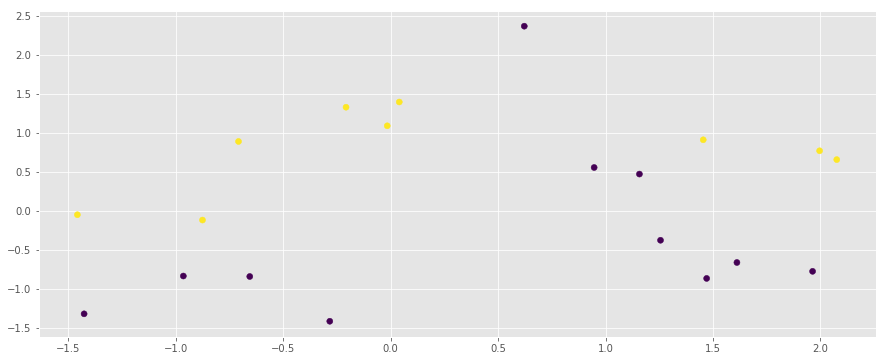

In [4]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

Gaussian Naive Bayes is used when the features are contineous variables.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from mlscratch.naive_bayes import GaussianNBClassifier

In [8]:
mdl = GaussianNBClassifier()

In [9]:
mdl.fit(X_train, y_train)

In [10]:
y_pred = mdl.predict(X_test)
y_pred

array([1, 1, 1, 0, 0])

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
cls = GaussianNB()

In [13]:
cls.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
y_pred = cls.predict(X_test)
y_pred

array([1, 0, 1, 0, 0])

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
sk_mdl = GaussianNB()

In [17]:
sk_mdl.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
sk_mdl.predict(X_test)

array([1, 1, 1, 0, 0])

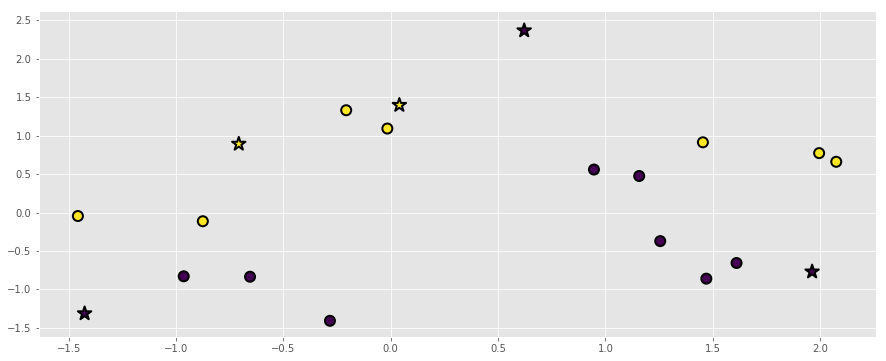

In [19]:
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, edgecolors='k', lw=2, s=100)
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred, marker='*',
            s=200, lw=2, edgecolors='k')

# Automated tests

In [20]:
for n_samples in [50, 100, 200]:
    for features in [2, 5, 10]:
        X, y = datasets.make_classification(n_samples=n_samples, n_features=features,
                                            n_informative=features-1, n_redundant=0,
                                            n_classes=2, random_state=42, 
                                            n_clusters_per_class=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        mdl = GaussianNBClassifier()
        mdl.fit(X_train, y_train)
        y_pred = mdl.predict(X_test)
        sk_mdl = GaussianNB()
        sk_mdl.fit(X_train, y_train)
        y_pred_sk = sk_mdl.predict(X_test)
        assert np.array_equal(y_pred, y_pred_sk)